<a href="https://colab.research.google.com/github/mostafa-ja/Anomaly-detection/blob/main/BGL_embedding_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Pretrained Models

https://www.sbert.net/docs/pretrained_models.html



In [ ]:
!wget 'https://raw.githubusercontent.com/mostafa-ja/Anomaly-detection/main/datasets/BGL/log2index'
!wget 'https://raw.githubusercontent.com/mostafa-ja/Anomaly-detection/main/datasets/BGL/reduced_index2embed'

--2023-09-06 08:45:49--  https://raw.githubusercontent.com/mostafa-ja/Anomaly-detection/main/datasets/BGL/log2index
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73231 (72K) [application/octet-stream]
Saving to: ‘log2index.1’

log2index.1         100%[===================>]  71.51K  --.-KB/s    in 0.02s   

2023-09-06 08:45:51 (4.64 MB/s) - ‘log2index.1’ saved [73231/73231]

--2023-09-06 08:45:51--  https://raw.githubusercontent.com/mostafa-ja/Anomaly-detection/main/datasets/BGL/reduced_index2embed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response..

In [ ]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

In [ ]:
import json
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
#Json file name
with open('/content/log2index') as f:
    logs = [line.strip() for line in f.readlines()]

print(len(logs))
print(logs[0])

736
ras kernel info instruction cache parity error corrected


In [ ]:
#Json file name
with open('/content/reduced_index2embed') as f:
    embeddings = [json.loads(line) for line in f.readlines()]

embed = np.array(embeddings)
embed.shape

(736, 60)

In [ ]:
#we already did pca on our data just based on train's template , so we cant do again
logs_embeddings_2d = embed[:,:2]
print(logs_embeddings_2d.shape)

(736, 2)


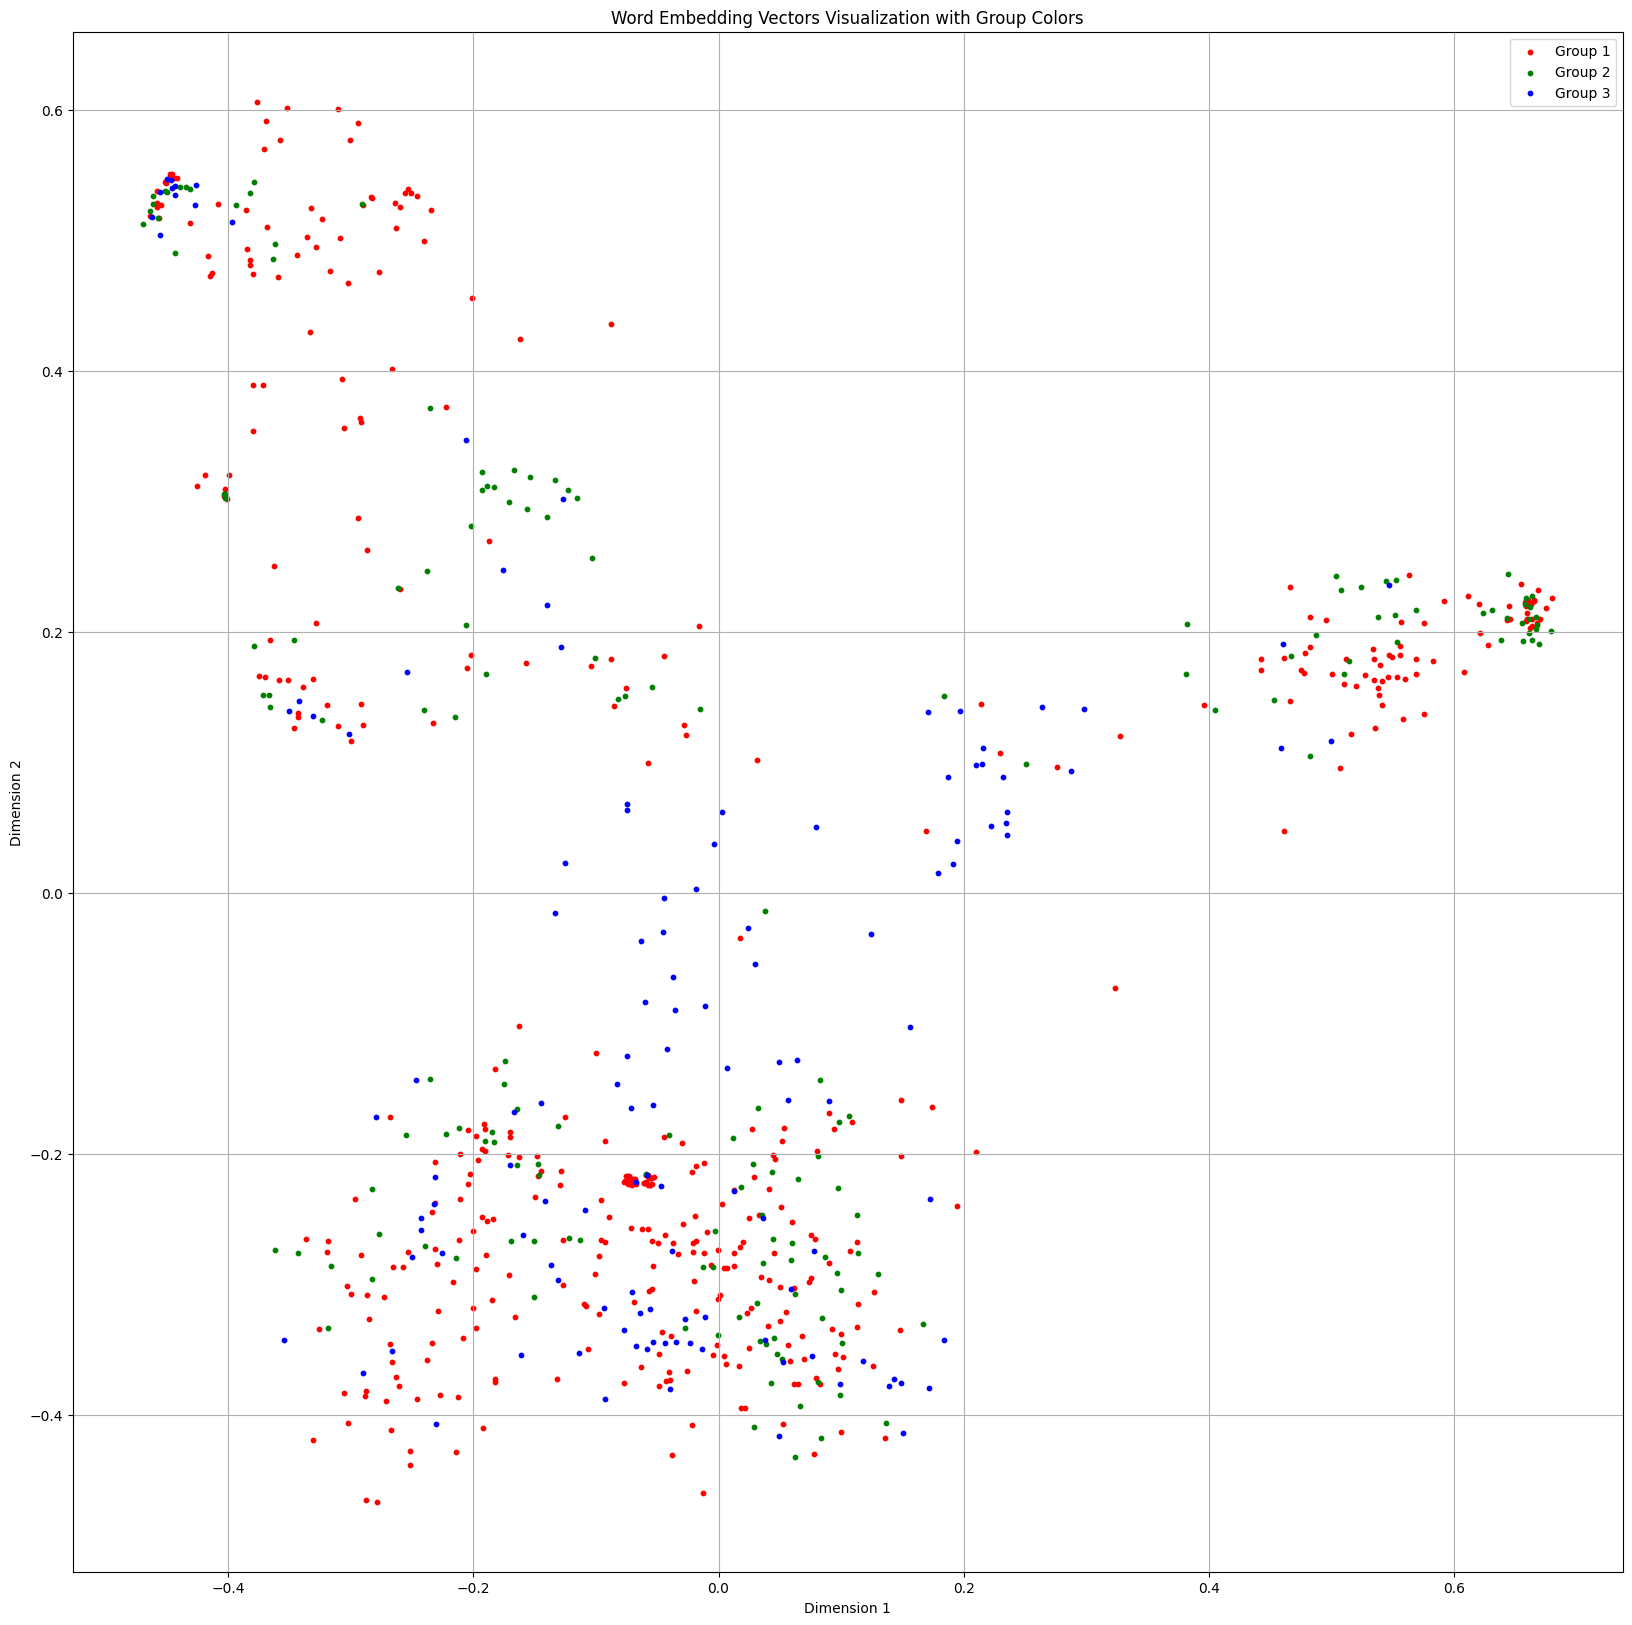

In [ ]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(20, 20))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# all-MiniLM-L6-v2

In [108]:
model_MiniLM = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
sentence_embeddings = model_MiniLM.encode(logs,convert_to_numpy=True)
print(sentence_embeddings.shape)

(736, 384)


In [109]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings[:437])
logs_embeddings_2d = pca.transform(sentence_embeddings)
print('logs_embeddings_2d.shape : ',logs_embeddings_2d.shape)
print('remained variance ration : ', np.sum(pca.explained_variance_ratio_))

logs_embeddings_2d.shape :  (736, 2)
remained variance ration :  0.2862801


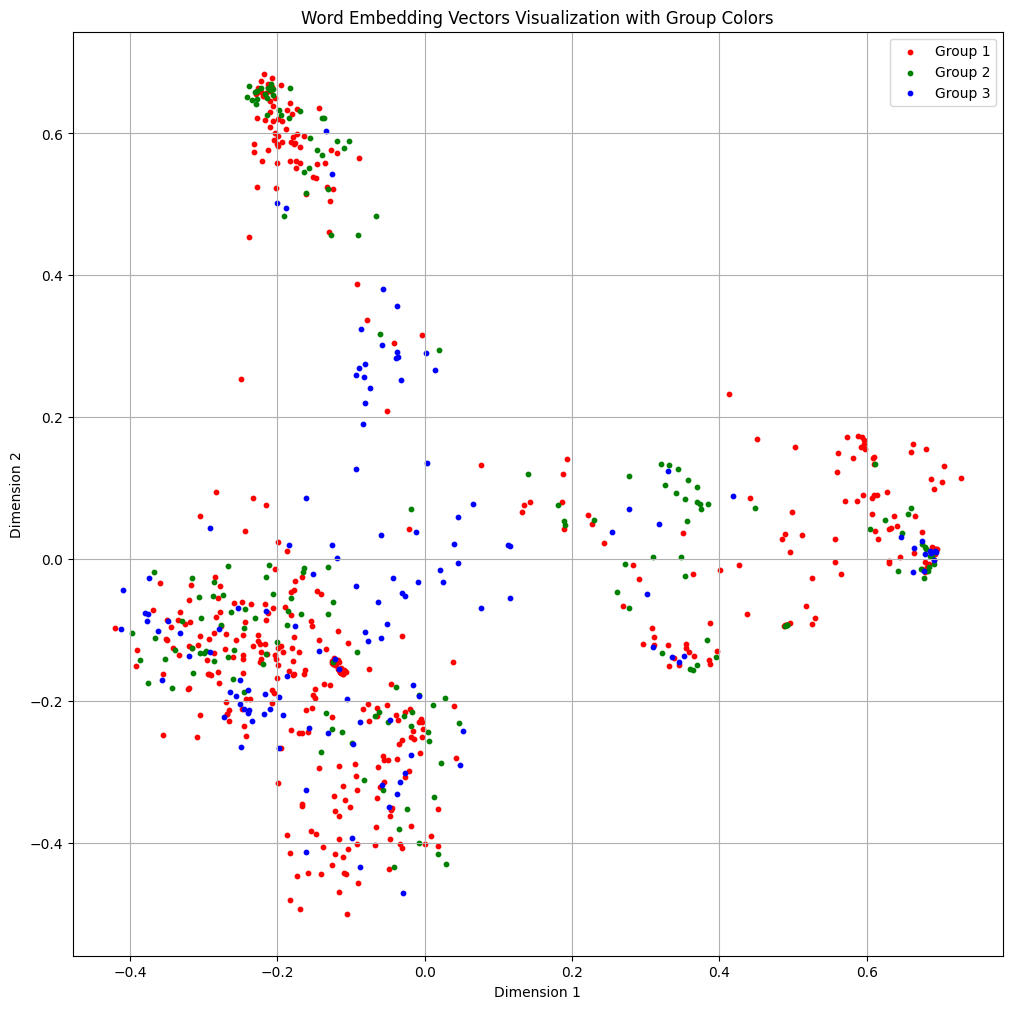

In [111]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(12, 12))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# average_word_embeddings_glove

In [ ]:
model_glove = SentenceTransformer('sentence-transformers/average_word_embeddings_glove.6B.300d')
sentence_embeddings = model_glove.encode(logs,convert_to_numpy=True)
print(sentence_embeddings.shape)

(736, 300)


In [ ]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings[:437])
logs_embeddings_2d = pca.transform(sentence_embeddings)
print('logs_embeddings_2d.shape : ',logs_embeddings_2d.shape)
print('remained variance ration : ', np.sum(pca.explained_variance_ratio_))

logs_embeddings_2d.shape :  (736, 2)
remained variance ration :  0.3000586


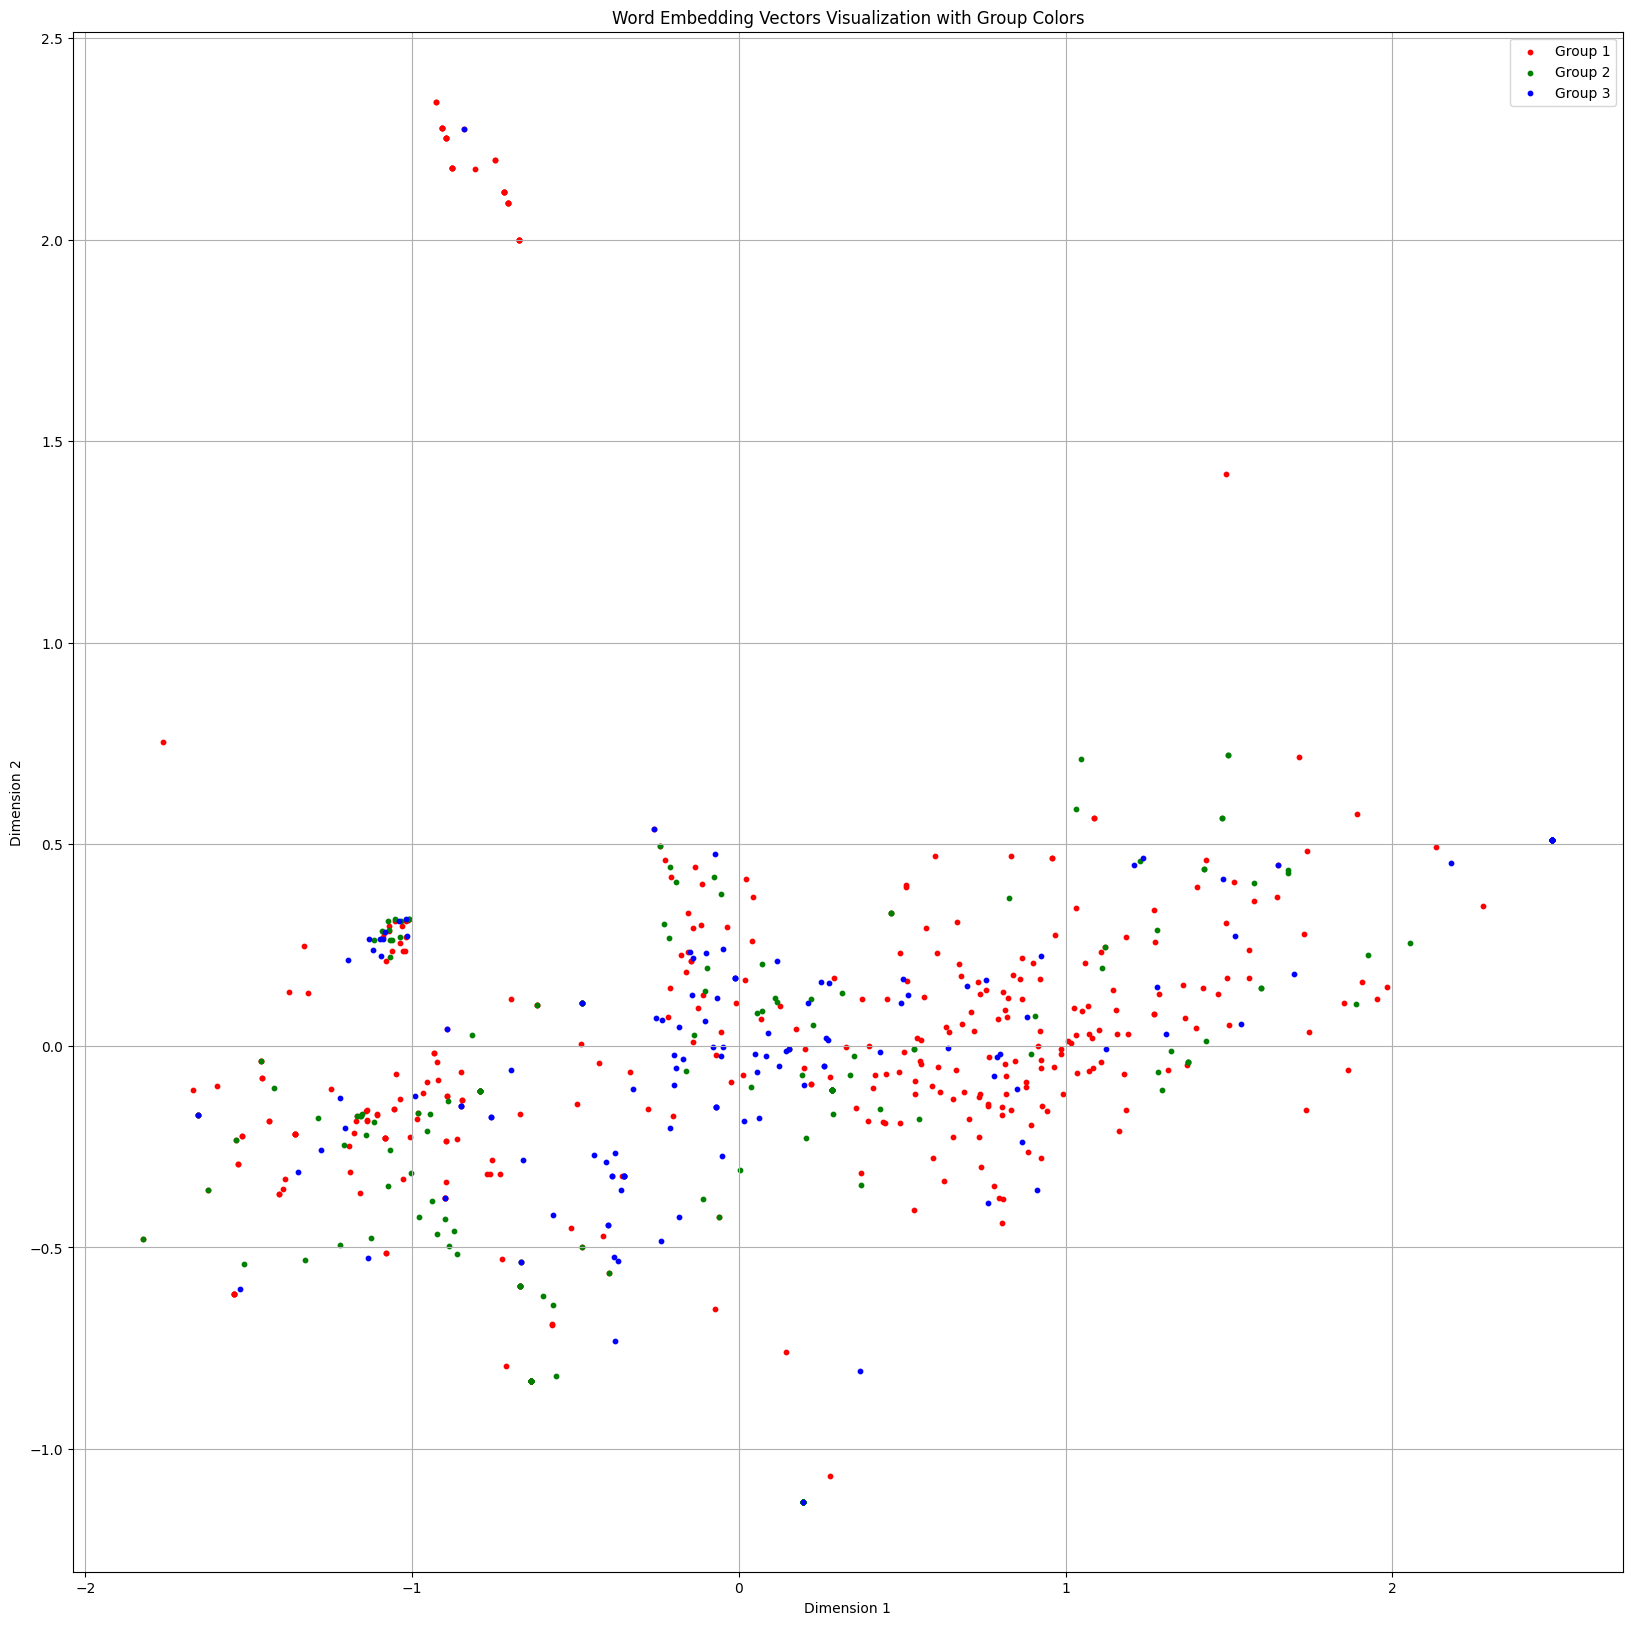

In [ ]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(20, 20))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# all-roberta-large-v1

In [ ]:
model_roberta = SentenceTransformer('sentence-transformers/all-roberta-large-v1')
sentence_embeddings = model_roberta.encode(logs,convert_to_numpy=True)
print(sentence_embeddings.shape)

(736, 1024)


In [ ]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings[:437])
logs_embeddings_2d = pca.transform(sentence_embeddings)
print('logs_embeddings_2d.shape : ',logs_embeddings_2d.shape)
print('remained variance ration : ', np.sum(pca.explained_variance_ratio_))

(736, 2)


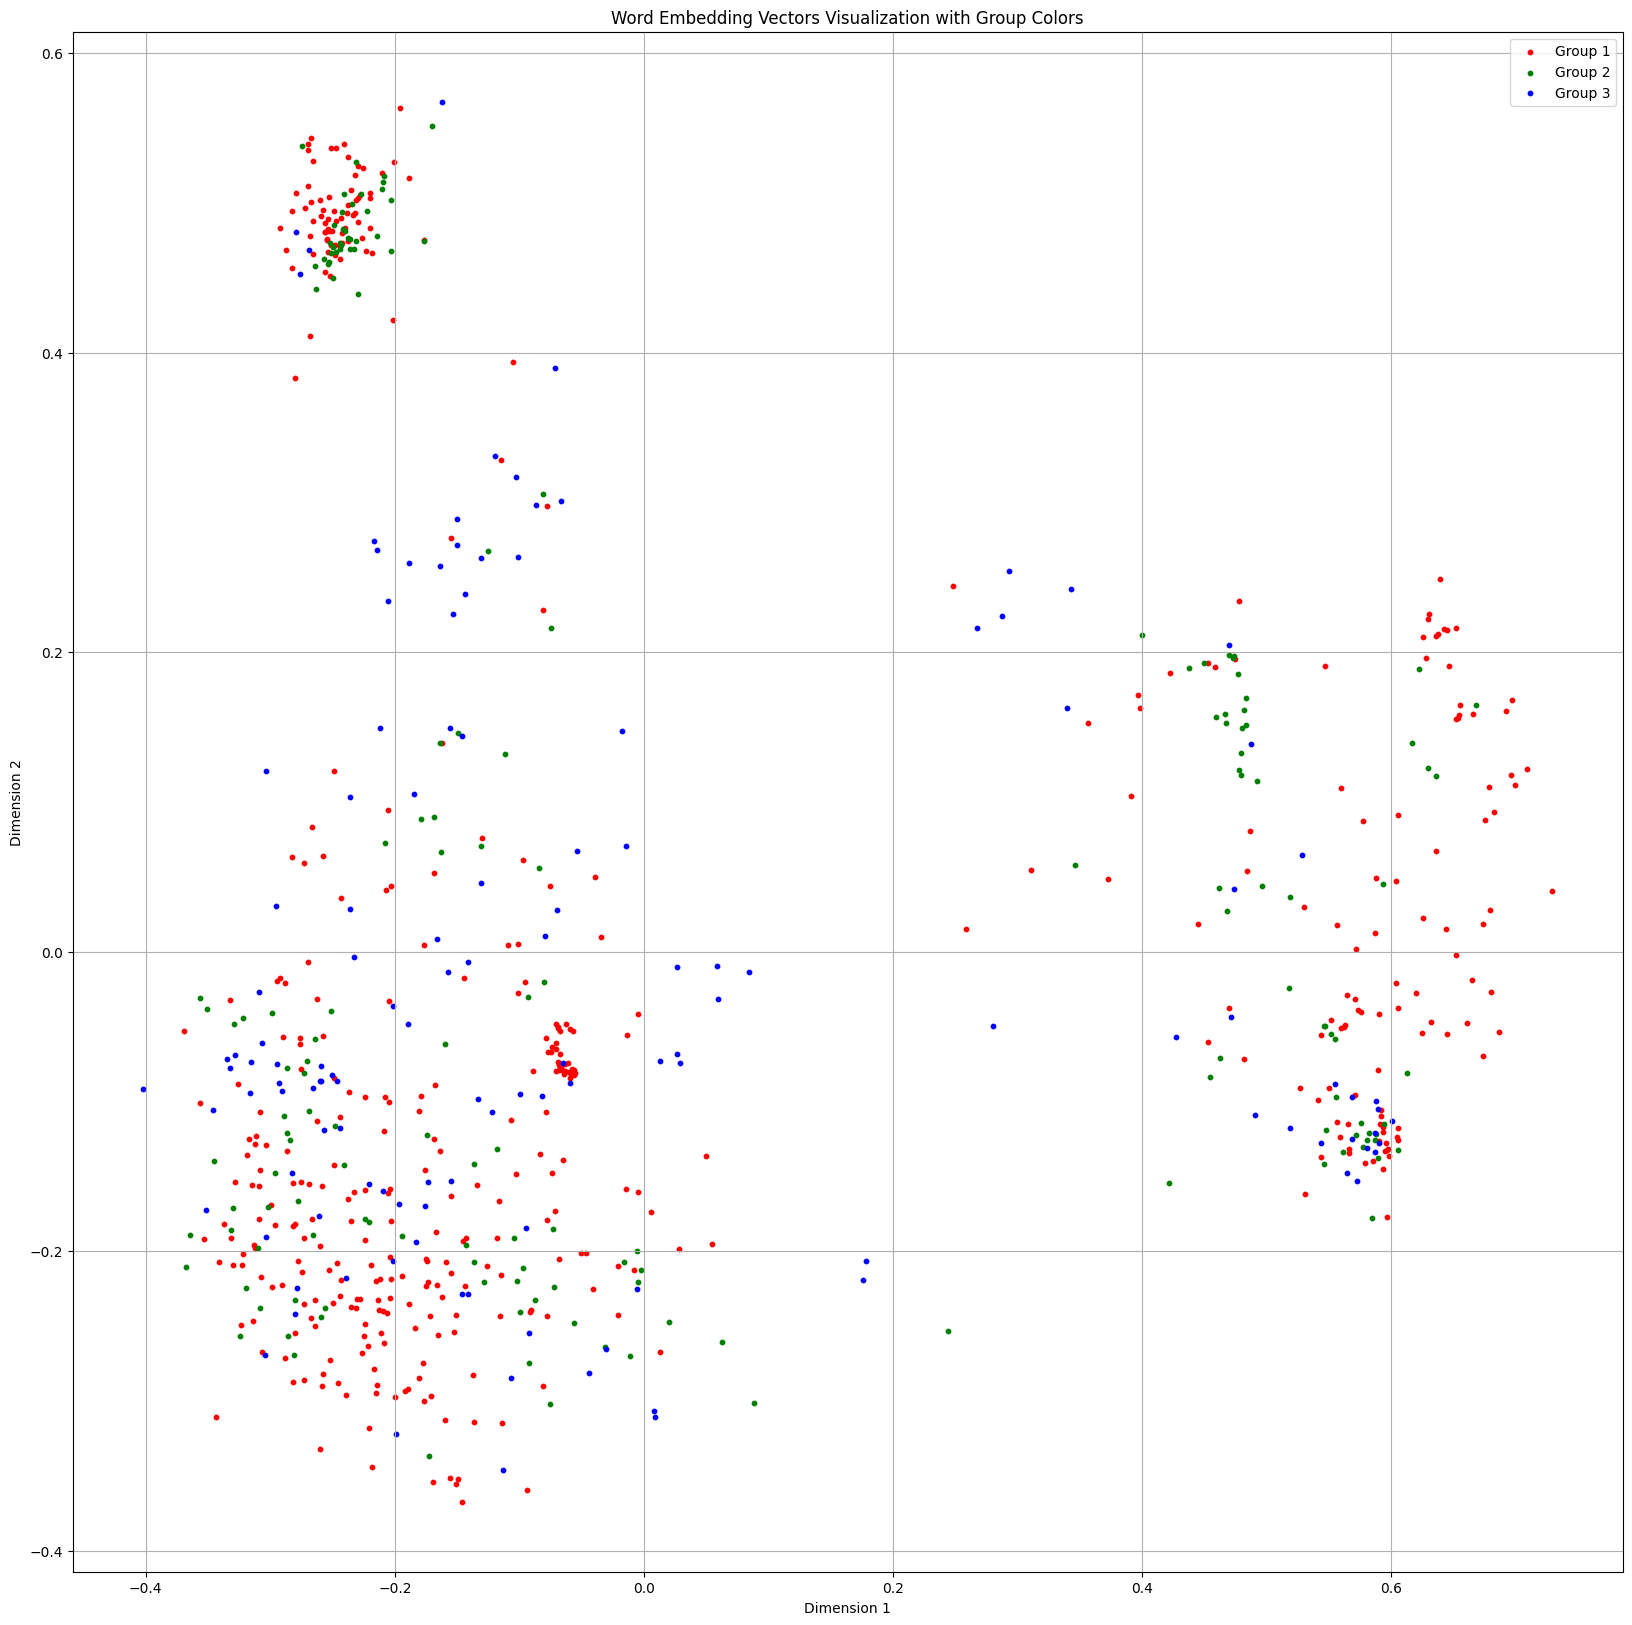

In [ ]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(20, 20))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# all-mpnet-base

In [ ]:
model_mpnet = SentenceTransformer('sentence-transformers/all-mpnet-base-v1')
sentence_embeddings = model_mpnet.encode(logs,convert_to_numpy=True)
print(sentence_embeddings.shape)

(736, 768)


In [ ]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings[:437])
logs_embeddings_2d = pca.transform(sentence_embeddings)
print('logs_embeddings_2d.shape : ',logs_embeddings_2d.shape)
print('remained variance ration : ', np.sum(pca.explained_variance_ratio_))

NameError: ignored

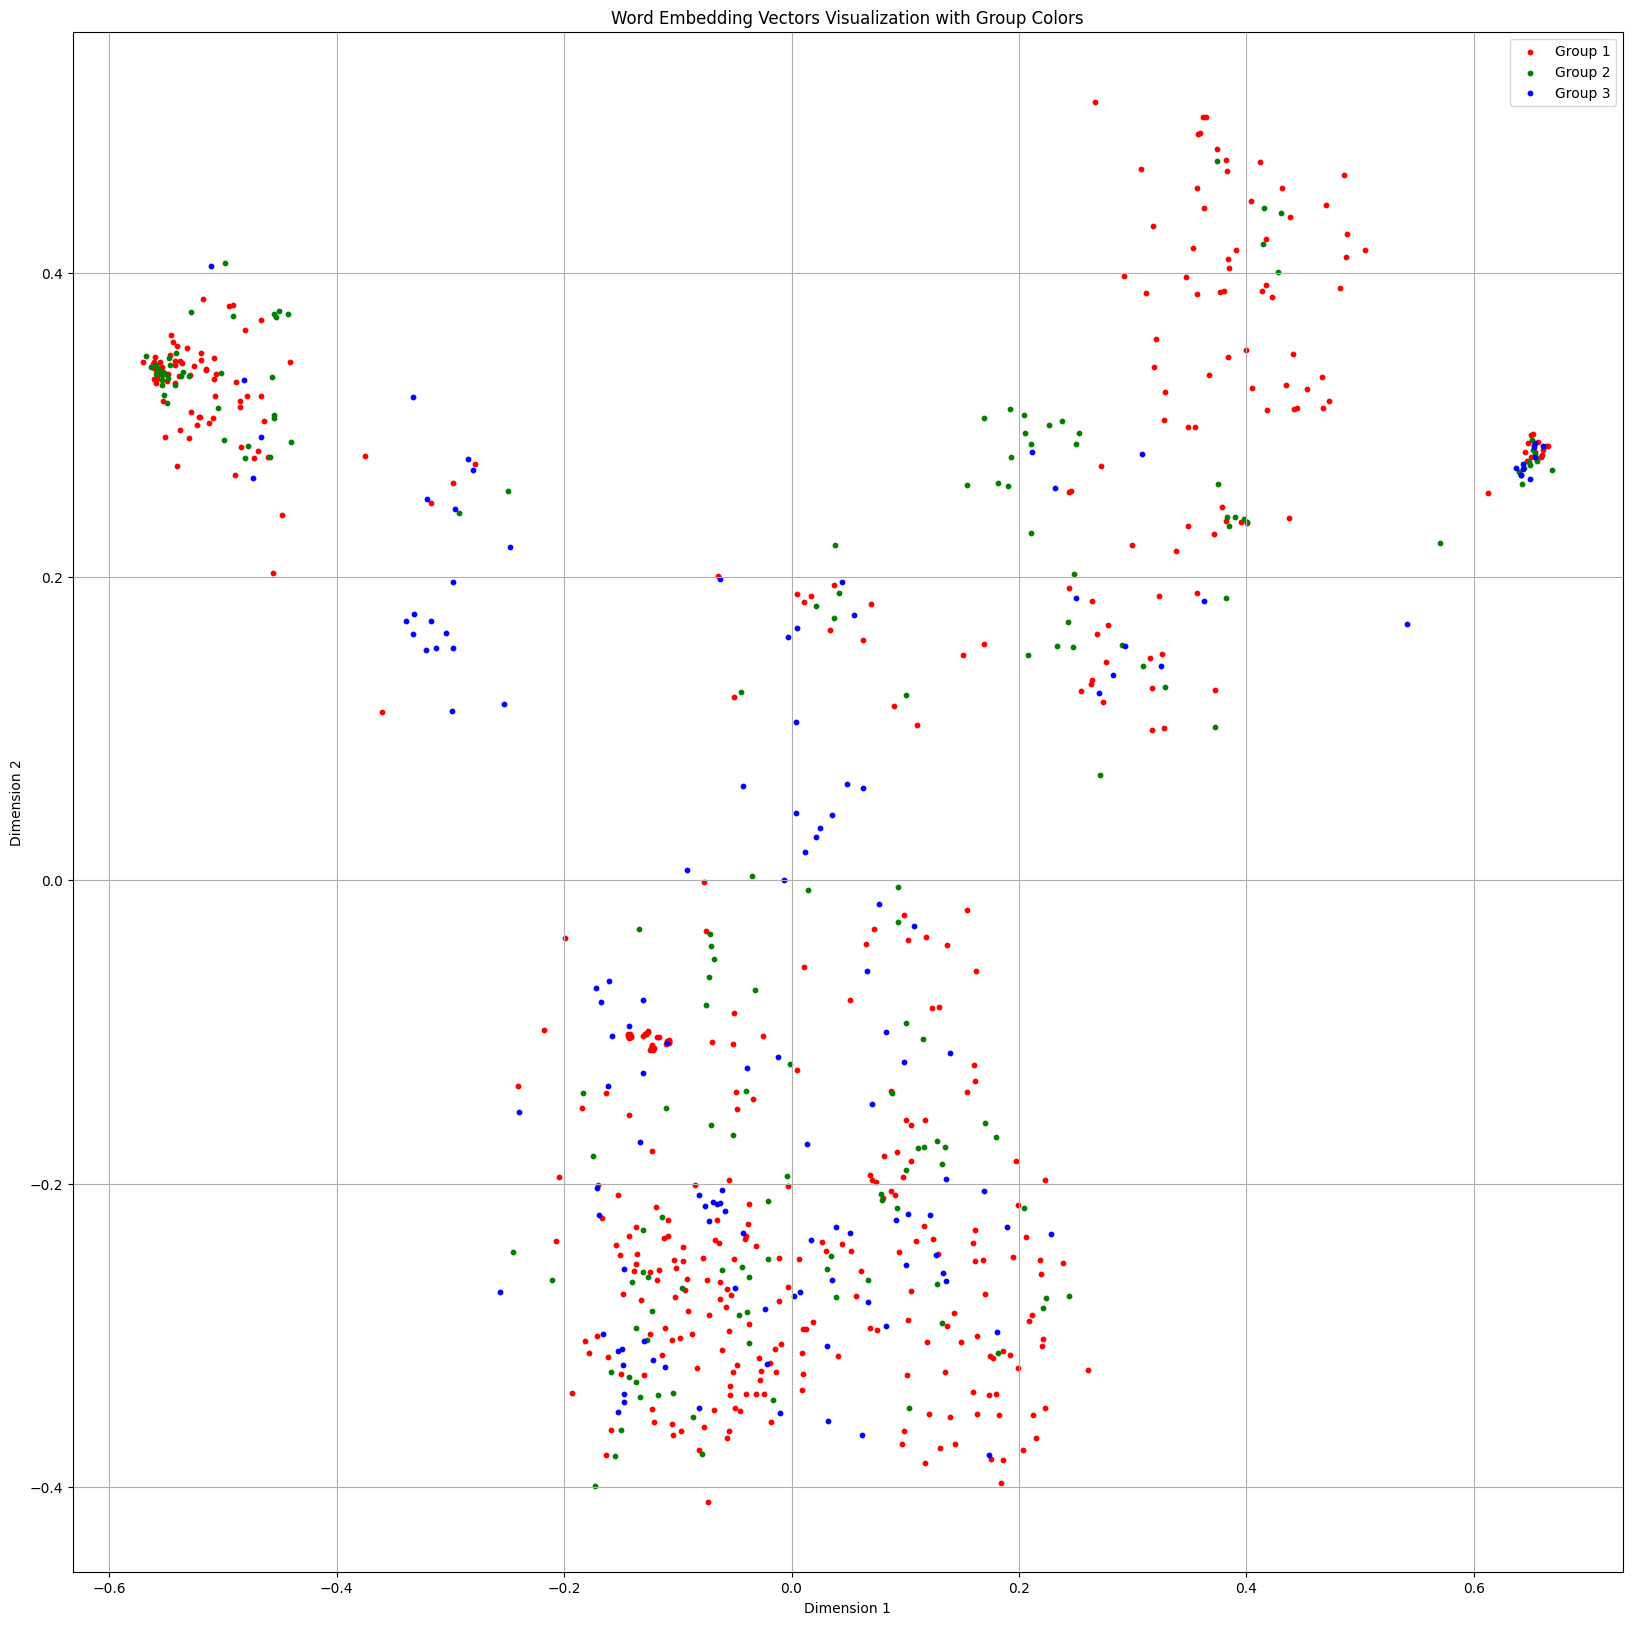

In [ ]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(20, 20))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# fastText

https://github.com/LogIntelligence/LogADEmpirical/blob/dev/dataset/generate_embeddings.py

https://github.com/mostafa-ja/Anomaly-detection/blob/main/B(semantic_vectors).ipynb

In [34]:
!wget 'https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip'

!unzip '/content/crawl-300d-2M.vec.zip'

--2023-09-06 09:52:41--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.162.120, 108.157.162.83, 108.157.162.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.162.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523785255 (1.4G) [application/zip]
Saving to: ‘crawl-300d-2M.vec.zip’

crawl-300d-2M.vec.z 100%[===================>]   1.42G  32.8MB/s    in 30s     

2023-09-06 09:53:12 (48.0 MB/s) - ‘crawl-300d-2M.vec.zip’ saved [1523785255/1523785255]

Archive:  /content/crawl-300d-2M.vec.zip
  inflating: crawl-300d-2M.vec       


In [40]:
import sys
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from typing import List
from time import time
import json

print("Loading word2vec model...")
st = time()
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('./crawl-300d-2M.vec', binary=False)
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
print("Loaded word2vec model in {:.2f} seconds".format(time() - st))

Loading word2vec model...
Loaded word2vec model in 0.00 seconds


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
word2vec_model['bread'].shape

(300,)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
# remove stop word and  punctuation, split by camel case
def clean_template(template: str, remove_stop_words: bool = True):
    template = " ".join([word.lower() if word.isupper() else word for word in template.strip().split()])
    template = re.sub('[A-Z]', lambda x: " " + x.group(0), template)  # camel case
    word_tokens = tokenizer.tokenize(template)  # tokenize
    word_tokens = [w for w in word_tokens if not w.isdigit()]  # remove digital
    if remove_stop_words:  # remove stop words, we can close this function
        filtered_sentence = [w.lower() for w in word_tokens if w not in stop_words]
    else:
        filtered_sentence = [w.lower() for w in word_tokens]

    template_clean = " ".join(filtered_sentence)
    return template_clean  # return string



def generate_embeddings_fasttext(templates, strategy = 'average'):
  """
  Generate embeddings for templates using fasttext
  Parameters
  ----------
  templates: list of templates
  strategy: average or tfidf

  Returns
  -------
  embeddings: dict of embeddings
  """

  cleaned_templates = [clean_template(template) for template in templates]
  embeddings = {}

  if strategy == 'average':
    for i, (cleaned_template, template) in enumerate(zip(cleaned_templates, templates)):
      template2vec = np.zeros(300) #300 = word2vector size
      for word in cleaned_template.split():
              template2vec += 1/(len(cleaned_template.split())) * word2vec_model.get_vector(word)

    embeddings[template] = template2vec.tolist()

  elif strategy == 'tfidf':


    vectorizer = TfidfVectorizer()
    matrix_weight = vectorizer.fit_transform(cleaned_templates)
    dic = vectorizer.vocabulary_

    for i, (cleaned_template, template) in enumerate(zip(cleaned_templates, templates)):
        template2vec = np.zeros(300) #300 = word2vector size
        for word in cleaned_template.split():
            j = dic.get(word)  # If the key is not present, dic.get(word)(or dic.get(word, default_value)) will return None (or any default value you provide), while dic[word] will raise a KeyError if the key is not found.
            if j is not None:
                try:
                    word_vector = word2vec_model.get_vector(word)
                    template2vec += matrix_weight[i, j] * word_vector
                except KeyError:
                    # Handle the case where the word is not found
                    pass

        embeddings[template] = template2vec.tolist()

  return embeddings

In [67]:
embeddings = generate_embeddings_fasttext(logs,'tfidf')

In [69]:
sentence_embeddings = np.array(list(embeddings.values()))
print(sentence_embeddings.shape)

(736, 300)


In [70]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings[:437])
logs_embeddings_2d = pca.transform(sentence_embeddings)
print('logs_embeddings_2d.shape : ',logs_embeddings_2d.shape)
print('remained variance ration : ', np.sum(pca.explained_variance_ratio_))

logs_embeddings_2d.shape :  (736, 2)
remained variance ration :  0.3714074920135715


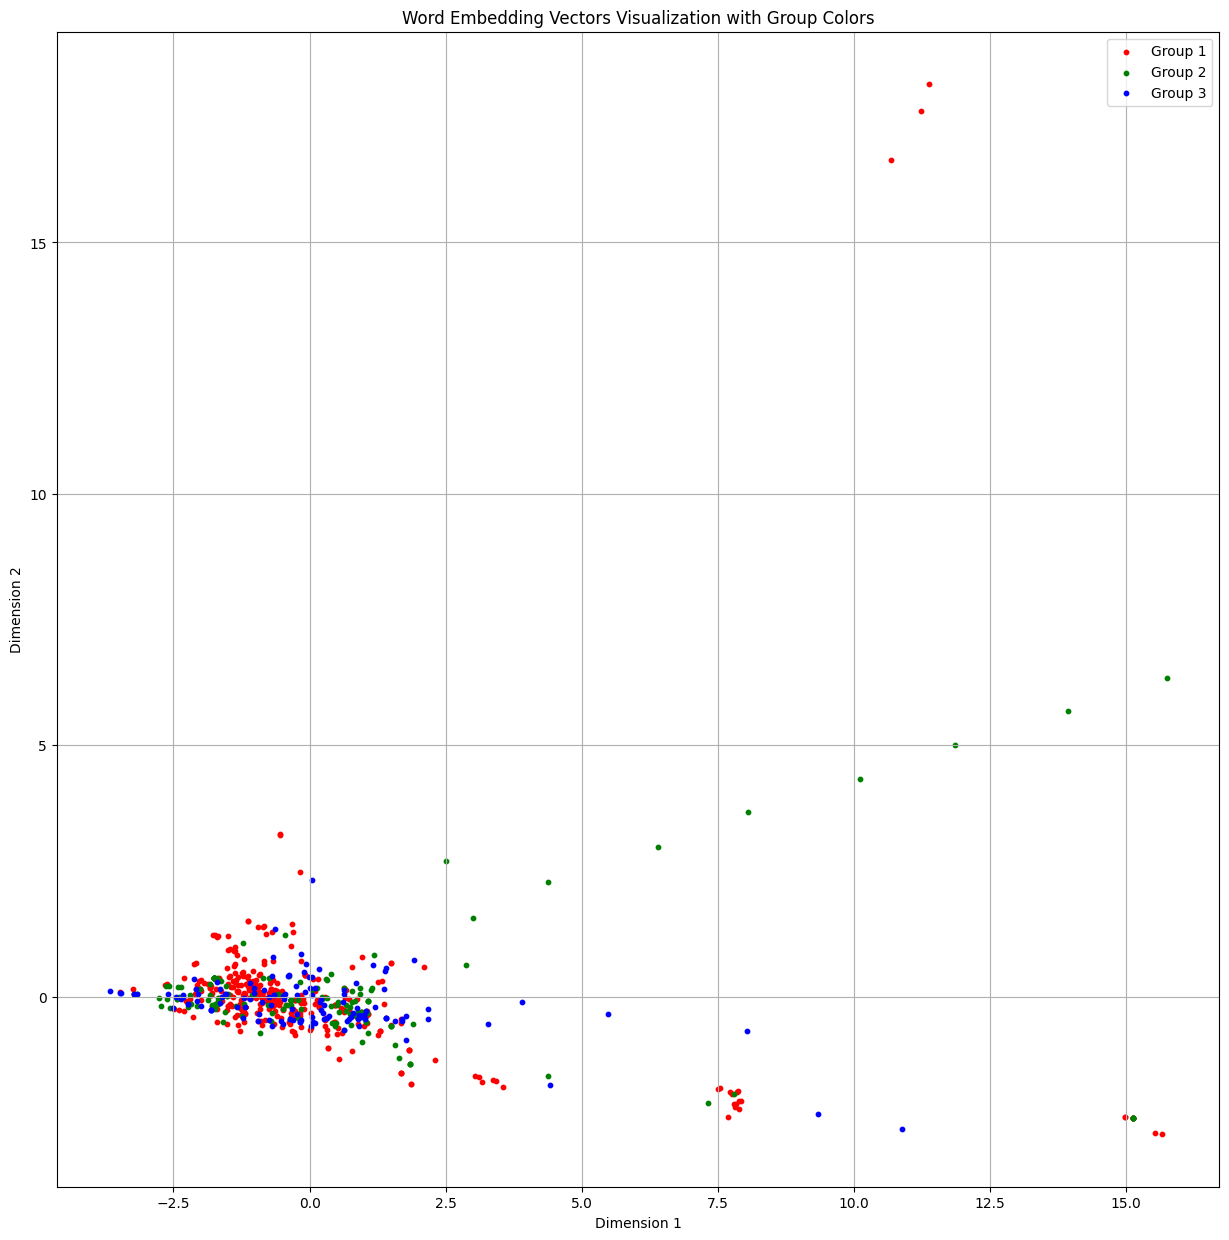

In [72]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(15, 15))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

In [79]:
from transformers import pipeline

extractor = pipeline(model="bert-base-uncased", task="feature-extraction")
result = extractor("This is a simple test.", return_tensors=True)
result.shape  # This is a tensor of shape [1, sequence_lenth, hidden_dimension] representing the input string.

torch.Size([1, 8, 768])

In [96]:
 extractor("This is a simple test.", return_tensors=True).shape

torch.Size([1, 8, 768])

In [90]:
embeddings = extractor(logs, return_tensors=True)

In [102]:
embeddings[20][0,-1,:].shape

torch.Size([768])

In [103]:
# Convert the list of PyTorch tensors to a list of NumPy arrays
numpy_list = [tensor[0,-1,:].numpy() for tensor in embeddings]

# Convert the list of NumPy arrays to a single NumPy array
sentence_embeddings = np.array(numpy_list)

In [104]:
sentence_embeddings.shape

(736, 768)

In [105]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings[:437])
logs_embeddings_2d = pca.transform(sentence_embeddings)
print('logs_embeddings_2d.shape : ',logs_embeddings_2d.shape)
print('remained variance ration : ', np.sum(pca.explained_variance_ratio_))

logs_embeddings_2d.shape :  (736, 2)
remained variance ration :  0.3337298


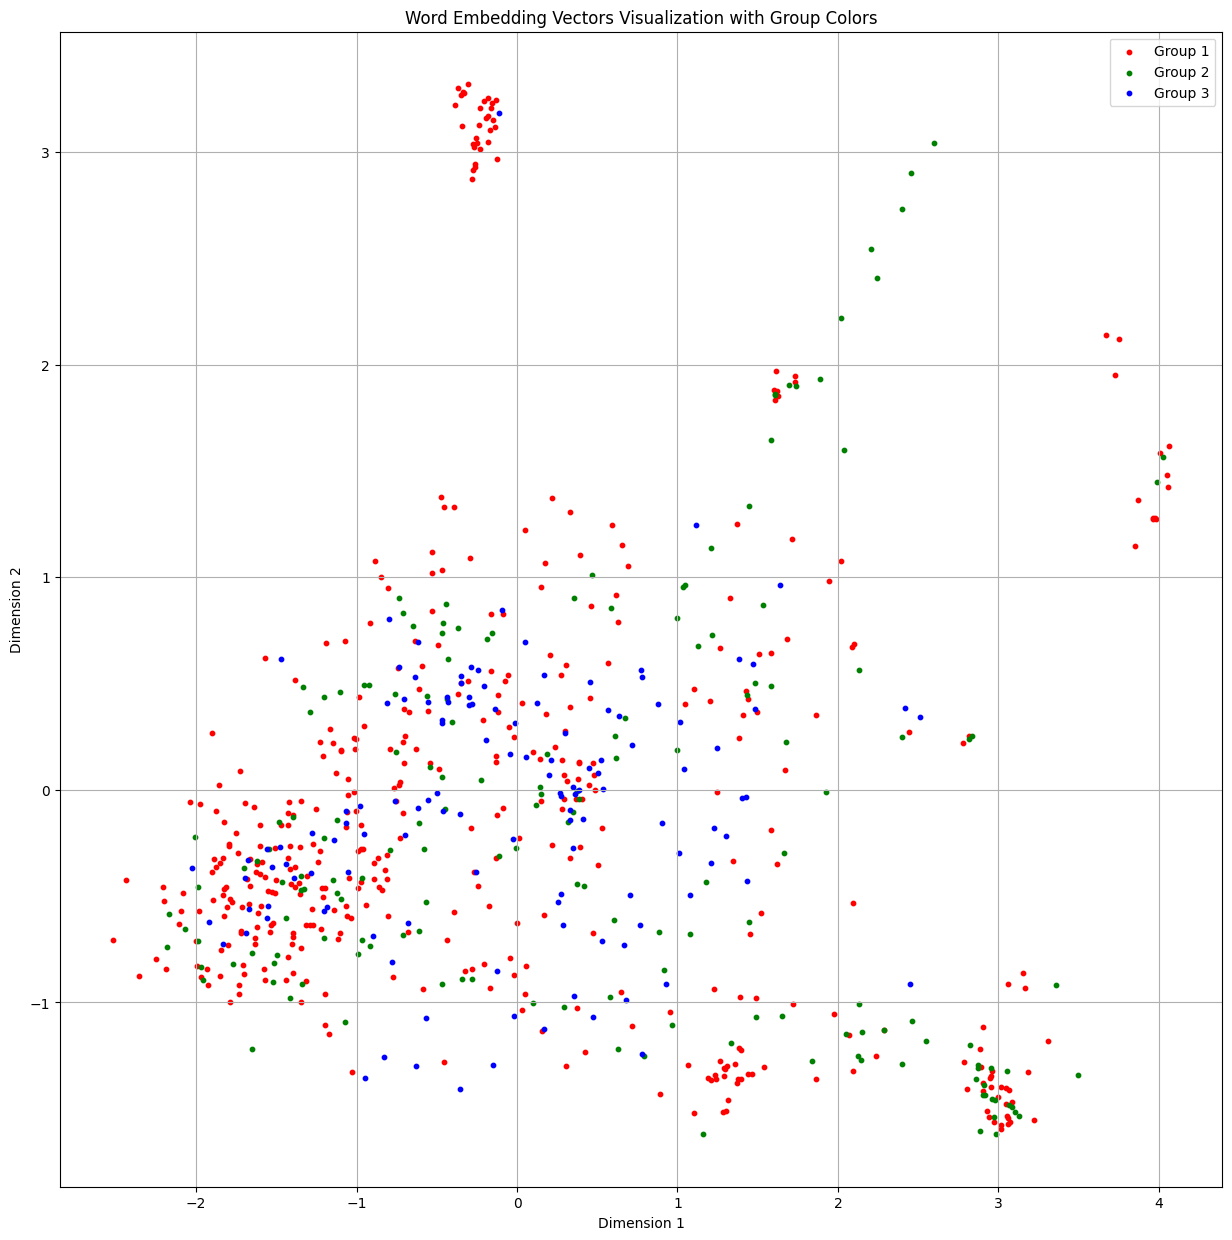

In [106]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(15, 15))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()